<a href="https://colab.research.google.com/github/fwetfgwe4gr/efed-baedon/blob/main/ZeroShotExample2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zero-shot image classification



```
# This is formatted as code
```

Zero-shot image classification is a task that involves classifying images into different categories using a model that was
not explicitly trained on data containing labeled examples from those specific categories.

Traditionally, image classification requires training a model on a specific set of labeled images, and this model learns to
"map" certain image features to labels. When there's a need to use such model for a classification task that introduces a
new set of labels, fine-tuning is required to "recalibrate" the model.

In contrast, zero-shot or open vocabulary image classification models are typically multi-modal models that have been trained on a large
dataset of images and associated descriptions. These models learn aligned vision-language representations that can be used for many downstream tasks including zero-shot image classification.

This is a more flexible approach to image classification that allows models to generalize to new and unseen categories
without the need for additional training data and enables users to query images with free-form text descriptions of their target objects .


In [ ]:
# Transformers installation
! pip install transformers datasets
# To install from source instead of the last release, comment the command above and uncomment the following one.
# ! pip install git+https://github.com/huggingface/transformers.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
pip install -q transformers

## Zero-shot image classification pipeline

In [ ]:
#load openAI Clip model
from transformers import pipeline

checkpoint = "openai/clip-vit-large-patch14"

detector = pipeline(model=checkpoint, task="zero-shot-image-classification")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [ ]:
from transformers import AutoProcessor, AutoModelForZeroShotImageClassification

model = AutoModelForZeroShotImageClassification.from_pretrained(checkpoint)
processor = AutoProcessor.from_pretrained(checkpoint)

In [ ]:
# Process image and text inputs
from transformers import CLIPProcessor
processor = CLIPProcessor.from_pretrained(checkpoint)
inputs = processor(images=image, text=candidate_labels, return_tensors="pt", padding=True)

In [ ]:
from google.colab import files
from io import BytesIO
from PIL import Image

uploaded = files.upload()

# Create a file-like object from the uploaded bytes
image_bytes = uploaded[list(uploaded.keys())[0]]
image_file = BytesIO(image_bytes)

# Load the image from the file-like object
image = Image.open(image_file)

Saving 1663132442-1663132442-4wdl40nsnsch.jpg to 1663132442-1663132442-4wdl40nsnsch.jpg


In [ ]:

# Class names : In MY CNN Approach I used the folders of the Saudi Wild Fauna Life to classify and link their names to the IDs of the lables of the model. Here, However, This takes
#a similar approach to LLMs (Large Language Models) Where the prompts do matter the most. If we remove for example (Sand Cat), then we get only 50% prediction of a wild cat, once we
# insert the (Sand Cat) label, it acheives 99% prediction rate!

candidate_labels = ['Aardvark','Aardwolf', 'Sand cat', 'African' 'buffalo','African elephant','African leopard','African Tree' 'Pangolin','Albatross','Alligator','Alpaca','American' 'robin','Anaconda','Angel' 'Fish','Angelfish','Anglerfish','Ant','Anteater','Antelope','Antlion','Ape','Aphid','Arab horse','Arabian leopard','Archer' 'Fish','Arctic' 'Fox','Arctic' 'Wolf','Armadillo','Arrow' 'crab','Asian' 'Elephant','Asp','Atlantic' 'Puffin','Aye-Aye','Baboon','Badger','Bald' 'eagle','Bandicoot','Bangle' 'Tiger','Barnacle','Barracuda','Basilisk','Bass','Basset' 'Hound','Bat','Beaked' 'whale','Bear','Bearded' 'Dragon','Beaver','Bedbug','Bee','Beetle','Beluga' 'Whale','Big-horned' 'sheep','Billy' 'goat','Bird','Bird' 'of' 'paradise','Bison','Black' 'Bear','Black' 'Fly','Black' 'Footed' 'Rhino','Black' 'panther','Black' 'Rhino','Black' 'widow' 'spider','Blackbird','Blowfish','Blue' 'bird','Blue' 'jay','Blue' 'whale','Boa','Boar','Bob-Cat','Bobcat','Bobolink','Bonobo','Booby','Border' 'Collie','Bornean' 'Orang-utan','Bottle-Nose' 'dolphin','Bovid','Box' 'jellyfish','Boxer' 'dog','Brown' 'Bear','Buck','Budgie','Buffalo','Bug','Bull','Bull' 'frog','Bull' 'Mastiff','Butterfly','Buzzard','Caiman' 'lizard','Camel','Canary','Cape' 'buffalo','Capybara','Cardinal','Caribou','Carp','Cat','Caterpillar','Catfish','Catshark','Cattle','Centipede','Cephalopod','Chameleon','Cheetah','Chickadee','Chicken','Chihuahua','Chimpanzee','Chinchilla','Chipmunk','Chupacabra','Cicada','Clam','Clown' 'Fish','Clownfish','Cobra','Cockatiel','Cockatoo','Cocker' 'Spaniel','Cockroach','Cod','Coho','Common' 'Dolphin','Common' 'seal','Condor','Constrictor','Coral','Corn' 'Snake','Cougar','Cow','Coyote','Crab','Crane','Crane' 'fly','Crawdad','Crawfish','Cray' 'fish','Crayfish','Cricket','Crocodile','Crow','Cuckoo','Cuckoo' 'bird','Cuttle' 'fish','Dacshund','Dalmation','Damsel' 'fly','Damselfly','Dart' 'Frog','Deer','Devi' 'Fish','Giant' ,'Sting' ,'ray','Diamond' 'back' 'rattler','Dik-dik','Dingo','Dinosaur','Doberman' 'Pinscher','Dodo' 'bird','Dog','Dolly' 'Varden','Dolphin','Donkey','Door' 'mouse','Dormouse','Dove','Draft' 'horse','Dragon','Dragonfly','Drake','Du-gong','Duck','Duckbill' 'Platypus','Dung' 'beetle','Eagle','Earthworm','Earwig','Echidna','Eclectus','Eel','Egret','Elephant','Elephant' 'seal','Elk','Emu','English' 'pointer','Ermine','Erne','Eurasian' 'Lynx','Falcon','Ferret','Finch','Firefly','Fish','Flamingo','Flatworm','Flea','Fly','Flyingfish','Fowl','Fox','Fresh' 'Water' 'Crocodile','Frog','Fruit' 'bat','Galapagos' 'Land' 'Iguana','Galapagos' 'Tortoise','Galliform','Gamefowl','Gazelle','Gecko','Gerbil','Giant' 'Anteater','Giant' 'panda','Giant' 'squid','Gibbon','Gila' 'monster','Giraffe','Gnat','Goat','Goldfish','Goose','Gopher','Gorilla','Grasshopper','Great' 'blue' 'heron','Great' 'white' 'shark','Green' 'fly','Green' 'poison' 'dart' 'frog','Green' 'Sea' 'Turtle','Grey' 'Whale','Grizzly' 'bear','Ground' 'shark','Ground' 'sloth','Groundhog','Grouse','Guan','Guanaco','Guinea' 'pig','Guineafowl','Gull','Guppy','Haddock','Halibut','Hammerhead' 'shark','Hamster','Hare','Harrier','Hawk','Hedgehog','Hermit' 'crab','Heron','Herring','Hippopotamus','Hookworm','Hornet','Horse','Hoverfly','Hummingbird','Humpback' 'whale','Hyena','Hyrax','Iguana','Iguanodon','Impala','Inchworm','Insect','Irrawaddy' 'Dolphin','Irukandji' 'jellyfish','Jackal','Jackrabbit','Jaguar','Jay','Jellyfish','June' 'bug','Junglefowl','Kangaroo','Kangaroo' 'mouse','Kangaroo' 'rat','Killer' 'Whale','King' 'Cobra','Kingfisher','Kite','Kiwi','Koala','Koi','Komodo' 'dragon','Kookaburra','Krill','Ladybug','Lama','Lamb','Lamprey','Lancelet','Land' 'snail','Lark','Leatherback' 'sea' 'turtle','Leech','Lemming','Lemur','Leopard','Leopon','Lice','Limpet','Lion','Lionfish','Lizard','Llama','Lobster','Locust','Loon','Louse','Lungfish','Lynx','Macaw','Mackerel','Magpie','Man-Of-War','Manatee','Mandrill','Manta' 'ray','Mantis','Marlin','Marmoset','Marmot','Marsupials','Mastodon','Meadowlark','Meerkat','Mink','Minnow','Mite','Mockingbird','Mole','Mollusk','Mollusks','Monarch' 'Butterfly','Mongoose','Monitor' 'lizard','Monkey','Moose','Mosquito','Moth','Mountain' 'goat','Mountain' 'Lion','Mouse','Mule','Muskox','Muskrat','Naked' 'Mole' 'Rat','Narwhal','Nautilus','Newt','Nightingale','Ocelot','Octopus','Opossum','Orangutan','Orca','Osprey','Ostrich','Otter','Owl','Ox','Panda','Panther','Panthera' 'hybrid','Parakeet','Parrot','Parrotfish','Partridge','Peacock','Peafowl','Pelican','Penguin','Perch','Peregrine' 'falcon','Pheasant','Pig','Pigeon','Pike','Pilot' 'whale','Pinniped','Piranha','Planarian','Platypus','Polar' 'bear','Pony','Porcupine','Porpoise','Possum','Prairie' 'dog','Prawn','Praying' 'mantis','Ptarmigan','Puffin','Puma','Python','Quail','Quelea','Quetzal','Quokka','Rabbit','Raccoon','Rainbow' 'trout','Rat','Rattlesnake','Raven','Ray','Red' 'panda','Reindeer','Reptile','Rhino','Rhinoceros','Right' 'whale','Ringworm','Roadrunner','Robin','Rodent','Rook','Rooster','Roundworm','Saber-toothed' 'cat','Sailfish','Salamander','Salmon','Salt' 'water' 'alligator','Sandpiper','Sawfish','Scallop','Scorpion','Sea' 'anemone','Sea' 'lion','Sea' 'slug','Sea' 'snail','Sea' 'urchin','Seahorse','Seal','Shark','Sheep','Shrew','Shrimp','Siberian' 'Husky','Siberian' 'Tiger','Skink','Skunk','Skunks','Slender' 'Loris','Sloth','Sloth' 'bear','Slug','Slugs','Smelt','Snail','Snails','Snake','Snipe','Snow' 'Fox','Snow' 'Hare','Snow' 'leopard','Sockeye' 'salmon','Sole','Somali' 'Wild' 'Ass','Sparrow','Spectacled' 'Bear','Sperm' 'whale','Spider','Spider' 'monkey','Sponge','Spoonbill','Squid','Squirrel','Star-nosed' 'mole','Starfish','Steelhead' 'trout','Stingray','Stoat','Stork','Sturgeon','Sugar' 'glider','Swallow','Swan','Swift','Swordfish','Swordtail','Tadpole','Tahr','Takin','Tamarin','Tapeworm','Tapir','Tarantula','Tarpan','Tarsier','Tasmanian' 'devil','Tazmanian' 'devil','Tazmanian' 'tiger','Termite','Tern','Terrapin','Thrush','Tick','Tiger','Tiger' 'shark','Tiglon','Toad','Tortoise','Toucan','Trapdoor' 'spider','Tree' 'frog','Trout','Tuna','Turkey','Turtle','Tyrannosaurus','Uakari','Umbrella' 'bird','Urchin','Urial','Urutu','Vampire' 'bat','Vampire' 'squid','Velociraptor','Velvet' 'worm','Vervet','Vicuna','Viper','Viper' 'Fish','Vole','Vulture','Wallaby','Walrus','Warbler','Warthog','Wasp','Water' 'buffalo','Water' 'Dragons','Weasel','Weevil','Whale','Whale' 'Shark','Whippet','White' 'Rhino','White' 'tailed' 'dear','Whitefish','Whooper','Whooping' 'crane','Widow' 'Spider','Wildcat','Wildebeest','Wolf','Wolf' 'Spider','Wolverine','Wombat','Woodchuck','Woodpecker','Wren','X-ray' 'fish','Xerinae','Yak','Yellow' 'Bellied' 'Marmot','Yellow' 'belly' 'sapsucker','Yellow' 'finned' 'tuna','Yellow' 'perch','Yeti','Yorkshire' 'terrier','Zander','Zebra','Zebra' 'Dove','Zebra' 'finch','Zebu','Zorilla']





Pass the inputs through the model, and post-process the results:

In [ ]:
!pip install transformers tensorflow onnx wikipedia matplotlib requests pillow torch torchvision #important for wikipedia and matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 46.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached

Top result: Arabian leopard with score 0.9829
Top result: Arabian leopard with score 0.9829


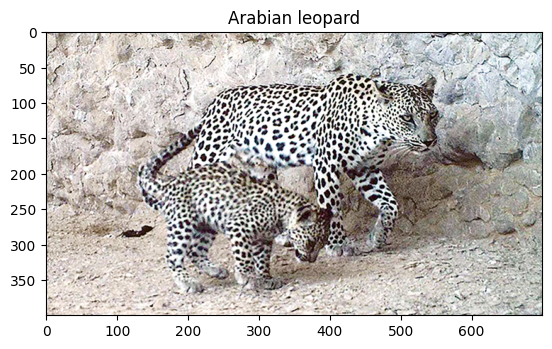

Excerpt: The Arabian leopard (Panthera pardus nimr) is the smallest leopard subspecies. It was described in 1830 and is native to the Arabian Peninsula, where it was widely distributed in rugged hilly and montane terrain until the late 1970s.


In [ ]:
import torch
with torch.no_grad():
    outputs = model(**inputs)

logits = outputs.logits_per_image[0]
probs = logits.softmax(dim=-1).numpy()
scores = probs.tolist()

result = [
    {"score": score, "label": candidate_label}
    for score, candidate_label in sorted(zip(probs, candidate_labels), key=lambda x: -x[0])
]

result
#delete everything after this line, if you want to print the score of the prediction instead of all the animals


top_result = result[0]
top_label = top_result["label"]
top_score = top_result["score"]
print(f"Top result: {top_label} with score {top_score:.4f}")

import wikipedia
import requests
from PIL import Image
import matplotlib.pyplot as plt
import os
import warnings


warnings.filterwarnings("ignore", category=UserWarning)

top_result = result[0]
top_label = top_result["label"]
top_score = top_result["score"]
print(f"Top result: {top_label} with score {top_score:.4f}")

#wikipedia.set_lang("ar")
page = wikipedia.page(top_label)


# Load the uploaded image file
image_file = BytesIO(uploaded[list(uploaded.keys())[0]])
image = Image.open(image_file)

# Display the image
plt.imshow(image)
plt.title(top_label)
plt.show()

excerpt = wikipedia.summary(top_label, sentences=2)  # fetch 2 sentences
print(f"Excerpt: {excerpt}")